# Basic data frame operations - with dplyr equivalents!

First we need some data - here I load the classic flights data from R!

There are some important things to bear in mind when using Pandas dataframes - especially if you are familiar with R dataframes.  In particular:

* Pandas data frames are wrappers around a Numpy matrix.  
* Pandas data frames add row and column metadata (attributes) to the Numpy matrix
* A Pandas data frame is a collection of Pandas Sequence (`Seq`) objects



In [261]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

In [227]:
df = pd.read_csv('flights.csv')
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776.000000,327346.000000,336776.000000,328521.000000,328521.000000
mean,2013,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,1971.923620,150.686460,1039.912604,13.173544,31.755501
std,0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,1632.471938,93.688305,733.233033,4.894426,18.230997
min,2013,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,0.000000,0.000000
25%,2013,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,16.000000
50%,2013,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,1496.000000,129.000000,872.000000,14.000000,31.000000
75%,2013,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,49.000000
max,2013,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000,24.000000,59.000000


## Slice

When working with Pandas data frames we can use normal matrix indexing to extract sub matrices - but this will be working with the underlying NumPy matrices and will strip off the Pandas row and column metadata.

For example here we extract a single row array:

In [228]:
df.values[1]

array([2013, 1, 1, 533.0, 4.0, 850.0, 20.0, 'UA', 'N24211', 1714, 'LGA',
       'IAH', 227.0, 1416, 5.0, 33.0], dtype=object)

Unless we really do not want a Pandas data frame as output we need a better way.  Pandas provides three indexers called `loc`, `iloc` and `ix`.  

`iloc` allows us to index the Pandas data frame as if it was a Numpy matrix *but* we retain the column and row metadata:

In [229]:
df.iloc[0:3,2:5]

,day,dep_time,dep_delay
0,1,517,2
1,1,533,4
2,1,542,2


`loc` allows us to index the data frame using matrix style indexing but using the column and row names.  In this example the row names are just the indexes of the row - so it does not look much different to the `iloc` example:

In [230]:
df.loc[0:3, :'dep_time']

,year,month,day,dep_time
0,2013,1,1,517
1,2013,1,1,533
2,2013,1,1,542
3,2013,1,1,544


`ix` allows us to mix and match styles.

## Filter

To filter we apply masks - just like in Numpy.  A mask can be returned by a `Seq` of boolean

In [231]:
#df_filtered = df[]
df.loc[(df.month == 2) & (df.day == 1) & (df.carrier == 'AA') & (df.origin == 'JFK') & (df.dest == 'LAX')]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
111446,2013,2,1,807,37,1134,34,AA,N320AA,33,JFK,LAX,347,2475,8,7
111516,2013,2,1,859,-1,1251,31,AA,N327AA,1,JFK,LAX,362,2475,8,59
111598,2013,2,1,1029,-1,1330,-10,AA,N324AA,19,JFK,LAX,344,2475,10,29
111664,2013,2,1,1155,-5,1511,1,AA,N329AA,3,JFK,LAX,344,2475,11,55
111732,2013,2,1,1342,-3,1647,-18,AA,N339AA,117,JFK,LAX,345,2475,13,42
111840,2013,2,1,1542,-3,1910,0,AA,N338AA,133,JFK,LAX,359,2475,15,42
111912,2013,2,1,1643,-2,2003,-2,AA,N319AA,181,JFK,LAX,346,2475,16,43
112166,2013,2,1,2106,121,2,97,AA,N336AA,21,JFK,LAX,331,2475,21,6
112192,2013,2,1,2219,44,121,31,AA,N320AA,185,JFK,LAX,340,2475,22,19


## Project - mutate

New columns can be created by simply assigning a compatible `Seq` to the new column name:

In [232]:
df['gain'] = df.arr_delay - df.dep_delay
df.loc[:,['gain', 'air_time']].describe()

,gain,air_time
count,327346.000000,327346.000000
mean,-5.659779,150.686460
std,18.043648,93.688305
min,-109.000000,20.000000
25%,-17.000000,82.000000
50%,-7.000000,129.000000
75%,3.000000,192.000000
max,196.000000,695.000000


More complex,'case-like', projections can be created.  For example if we wanted to create a 1/0 flag that identify flights that caught up on delays, i.e. postive gain:

In [233]:
# Add new column of zeros
df['gained'] = 0 
# Where gain is negative set gained = 0 else gained = gain
df.loc[df.gain < 0, 'gained'] = df.loc[df.gain < 0, 'gain']
# Let's see if it worked
df.loc[:,['gained','gain']].describe()

,gained,gain
count,336776.000000,327346.000000
mean,-9.792470,-5.659779
std,10.835929,18.043648
min,-109.000000,-109.000000
25%,-16.000000,-17.000000
50%,-7.000000,-7.000000
75%,0.000000,3.000000
max,0.000000,196.000000


To remove a column set subset columns:

In [248]:
print('Before:')
print(df.columns)
df2 = df.ix[:,:'gain']
print('After:')
print(df2.columns)

# Must be an easier way !!

Before:
Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'gain', 'gained'],
      dtype='object')
After:
Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'gain'],
      dtype='object')


In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});
df.ix[df.AAA > 5, 'BBB'] = -1; df

## Sorting

In [ ]:
df2 = df.loc[(df.month == 2) & (df.day == 1) & (df.carrier == 'AA') & (df.origin == 'JFK') & (df.dest == 'LAX')]
df2.sort_values(by=('hour'), ascending=False)

## Summaries

<Container object of 12 artists>

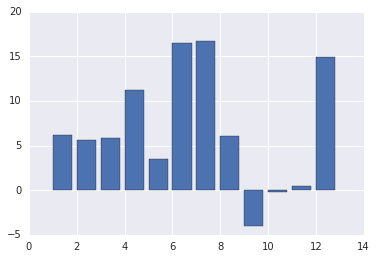

In [262]:
#df2 = df.ix[:,['month','dep_delay']].groupby('month').mean()
df2 = df.groupby('month').mean()
plt.bar(left=df2.index, height=df2.arr_delay, )

We can aggregate over more than one dimension:

In [ ]:
df3 = df.groupby(['month','day']).mean()
df3.shape()

We can also describe our data by group:

In [260]:
df.groupby('month')['arr_delay'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,26398,6.129972,40.423898,-70,-15,-3,13,1272
2,23611,5.613019,39.528619,-70,-15,-3,13,834
3,27902,5.807577,44.119192,-68,-18,-6,13,915
4,27564,11.176063,47.491151,-68,-15,-2,19,931
5,28128,3.521509,44.237613,-86,-20,-8,11,875
6,27075,16.481330,56.130866,-64,-15,-2,26,1127
7,28293,16.711307,57.117088,-66,-16,-2,27,989
8,28756,6.040652,42.595142,-68,-18,-5,14,490
9,27010,-4.018364,39.710309,-68,-23,-12,1,1007


## Joins